
#EMAI651 –Computer Vision _ Assignment 2
#**Brain Tumor Detection Using Deep Learning**
#Lamia Al-Shahrani 2402826


#Dr. Salma Kammoun


In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to the ZIP file on Google Drive
zip_file_path = '/content/drive/MyDrive/archive-4.zip'
extract_to = '/content/Brain Tumor Detection0'

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [ ]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to list image files in a folder while ignoring non-image files
def list_image_files(folder_path):
    return [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]

# Paths to the TRAIN, VAL, and TEST folders
train_folder_path = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'
val_folder_path = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'
test_folder_path = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TEST'

# Check and list image files for each folder
for folder_path, folder_name in zip([train_folder_path, val_folder_path, test_folder_path], ['TRAIN', 'VAL', 'TEST']):
    image_files = list_image_files(folder_path)
    if len(image_files) == 0:
        print(f"No images found in the {folder_name} folder.")
    else:
        print(f"Number of images in the {folder_name} folder: {len(image_files)}")
        print(f"Sample images from {folder_name}:", image_files[:10])  # Display the first 10 images to verify

# Optionally, load and display one image from the TRAIN folder using OpenCV for verification
sample_image_path = os.path.join(train_folder_path, list_image_files(train_folder_path)[0])
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

if image is None:
    print(f"Error: The image at {sample_image_path} could not be loaded. Please check the file format.")
else:
    print(f"Image loaded successfully from {sample_image_path}!")

# Setup ImageDataGenerators for training, validation, and testing data
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Load images from the TRAIN, VAL, and TEST folders
train_generator = datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN',
    classes=['TRAIN'],  # Specify the TRAIN folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN',
    classes=['VAL'],  # Specify the VAL folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN',
    classes=['TEST'],  # Specify the TEST folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# The code above will prepare image data for training, validation, and testing


Number of images in the TRAIN folder: 500
Sample images from TRAIN: ['y297.jpg', 'y124.jpg', 'y263.jpg', 'y314.jpg', 'y131.jpg', 'y160.jpg', 'y320.jpg', 'y145.jpg', 'y316.jpg', 'y375.jpg']
Number of images in the VAL folder: 500
Sample images from VAL: ['y297.jpg', 'y124.jpg', 'y263.jpg', 'y314.jpg', 'y131.jpg', 'y160.jpg', 'y320.jpg', 'y145.jpg', 'y316.jpg', 'y375.jpg']
Number of images in the TEST folder: 100
Sample images from TEST: ['y761.jpg', 'y782.jpg', 'y785.jpg', 'y768.jpg', 'y786.jpg', 'y720.jpg', 'y773.jpg', 'y779.jpg', 'y762.jpg', 'y711.jpg']
Image loaded successfully from /content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/y297.jpg!
Found 3560 images belonging to 1 classes.
Found 3261 images belonging to 1 classes.
Found 3160 images belonging to 1 classes.


#1. Feature Extraction Using HOG and LBP with OpenCV


# a. Histogram of Oriented Gradients (HOG)



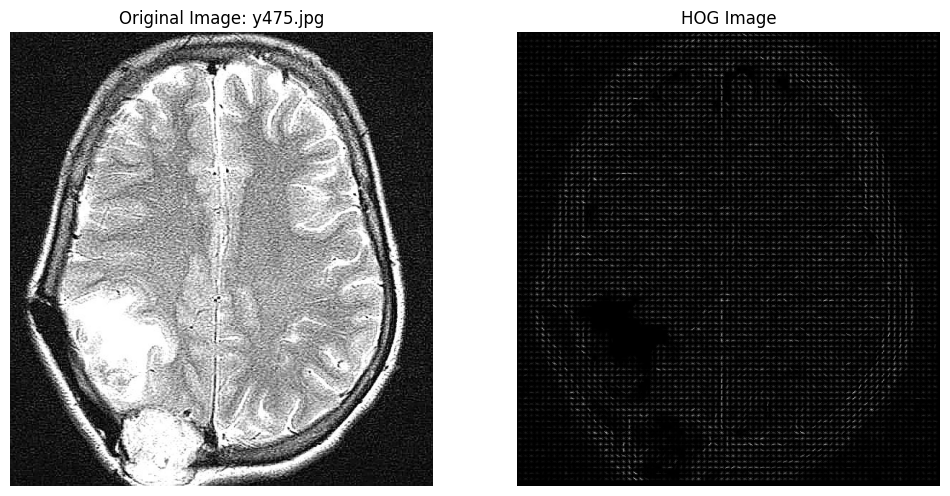

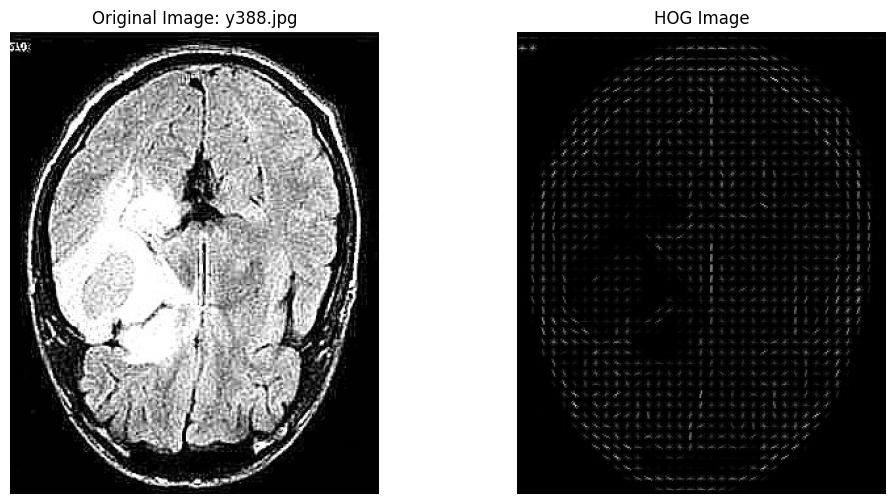

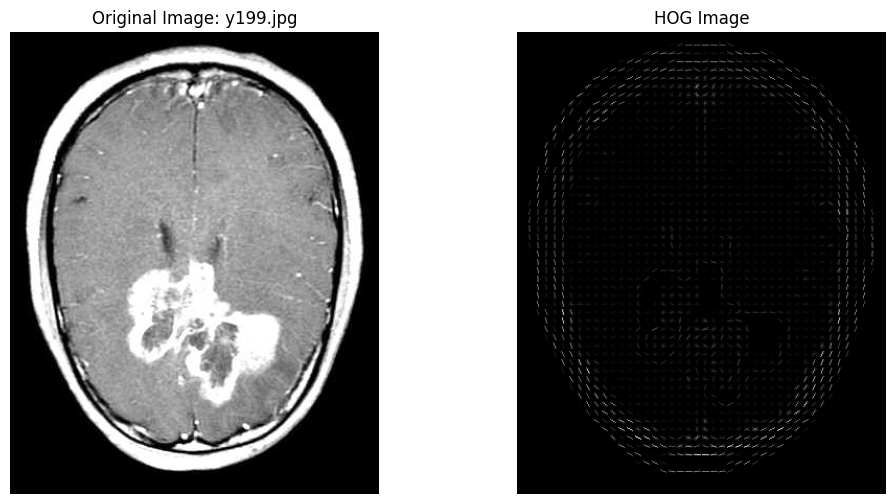

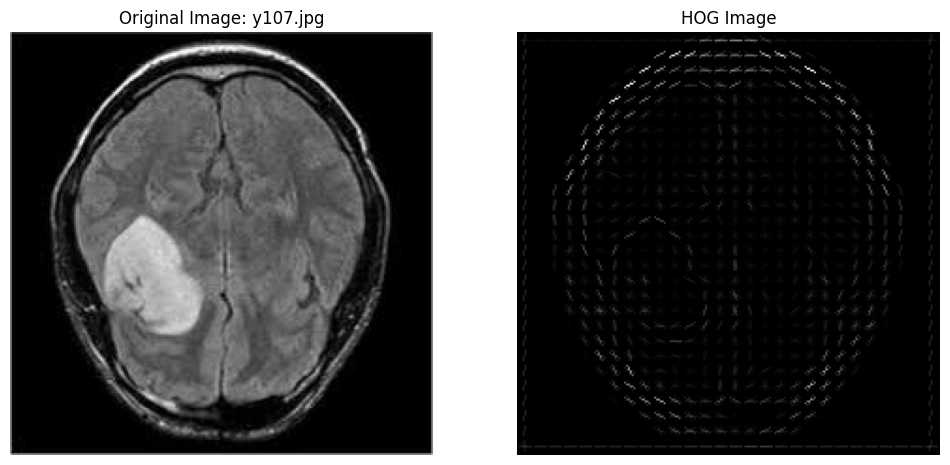

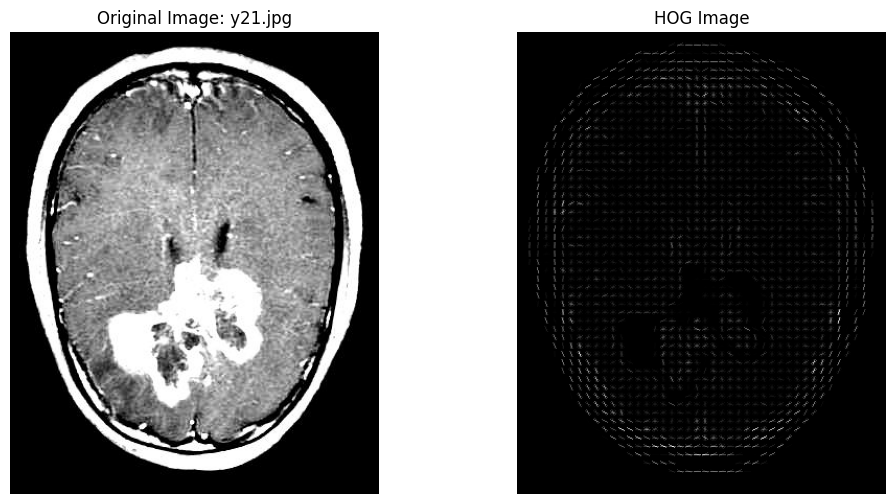

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import os

# Path to the directory containing the images
directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'

# Get a list of images in the directory
images = [f for f in os.listdir(directory) if f.endswith(('.jpg'))]

# Process a sample of five images
for image_name in images[:5]:  # Limiting to the first five images
    image_path = os.path.join(directory, image_name)

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Compute HOG features and visualize the HOG image
    features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), visualize=True)

    # Scale the HOG image to the range [0, 255]
    hog_image = (hog_image / hog_image.max()) * 255
    hog_image = hog_image.astype(np.uint8)

    # Display the original image and the HOG image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Original Image: {image_name}')  # Title for the original image
    plt.axis('off')  # Hide the axis

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')  # Display the HOG image
    plt.title('HOG Image')  # Title for the HOG image
    plt.axis('off')  # Hide the axis

    plt.show()  # Show the plot


#b. Local Binary Patterns (LBP)



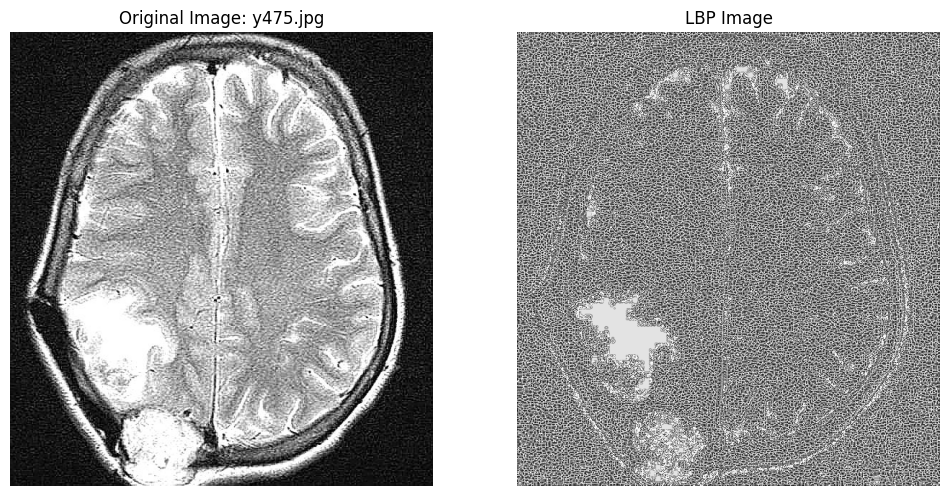

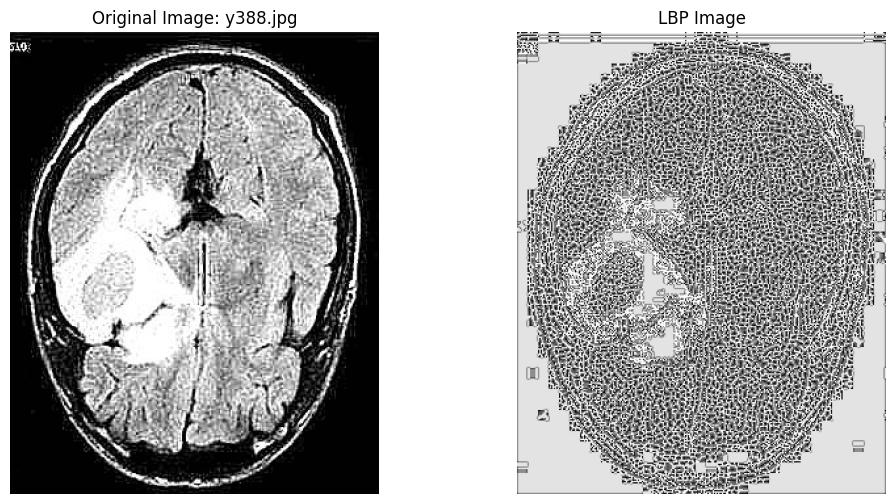

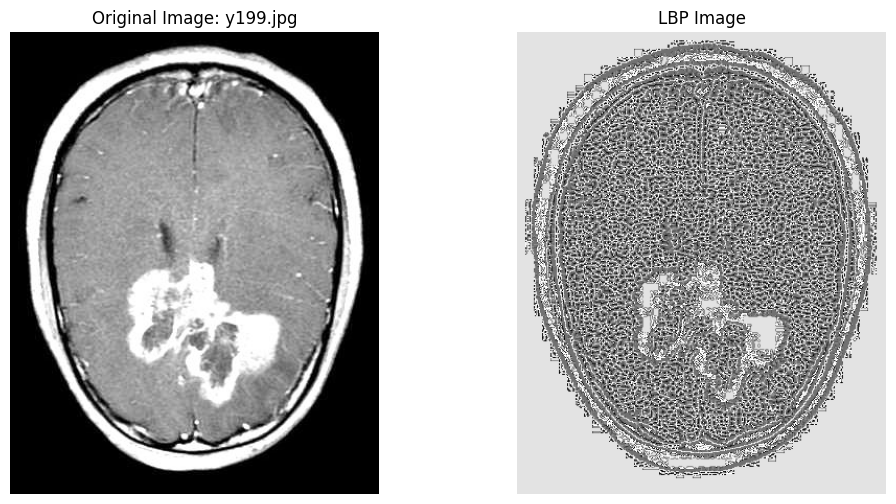

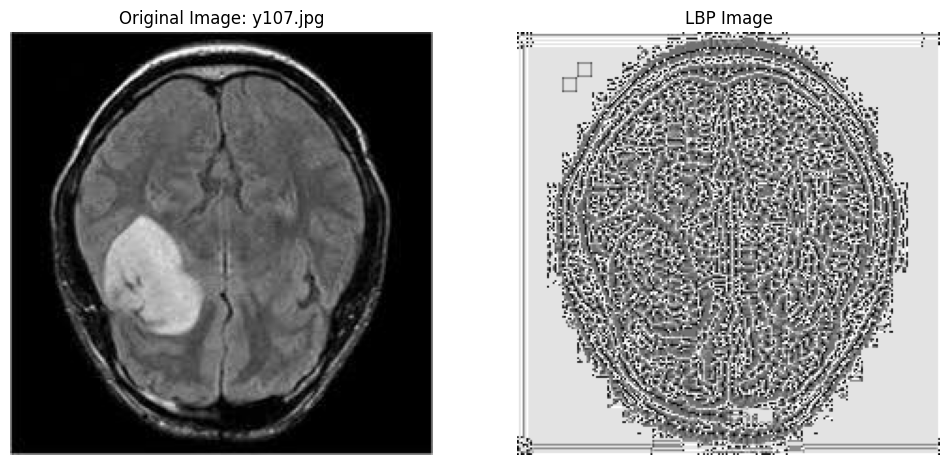

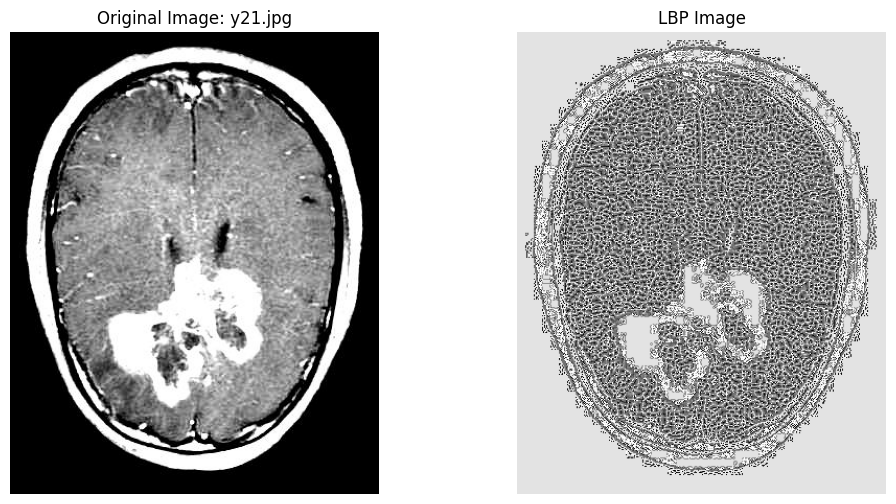

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
import os

# Path to the directory containing the images
directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'

# Get a list of images in the directory
images = [f for f in os.listdir(directory) if f.endswith(('.jpg'))]

# Process a sample of five images
for image_name in images[:5]:  # Limiting to the first five images
    image_path = os.path.join(directory, image_name)

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Compute Local Binary Patterns (LBP)
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method='uniform')  # P=8 points and R=1 radius

    # Compute the histogram of LBP
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)  # Normalized histogram

    # Normalize the histogram
    hist = hist.cumsum()  # Cumulative distribution function
    hist /= hist[-1]  # Normalize to [0, 1]

    # Display the original image and the LBP image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Original Image: {image_name}')  # Title for the original image
    plt.axis('off')  # Hide the axis

    plt.subplot(1, 2, 2)
    plt.imshow(lbp, cmap='gray')  # Display the LBP image
    plt.title('LBP Image')  # Title for the LBP image
    plt.axis('off')  # Hide the axis

    plt.show()  # Show the plot


#2. Feature Extraction Using Pre-Trained CNN Models


#a. Using VGG-16 with Keras



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


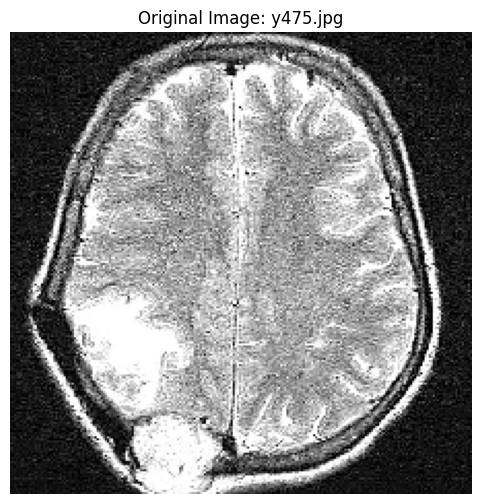

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


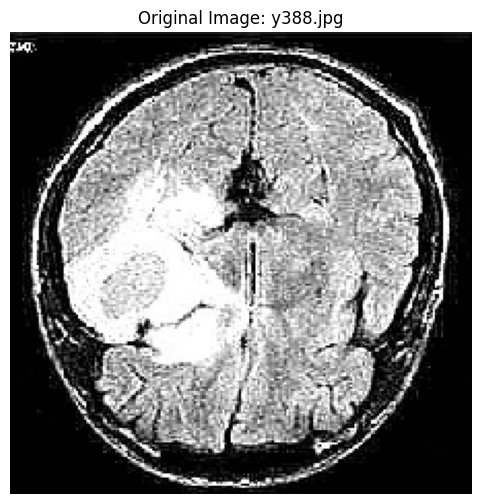

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


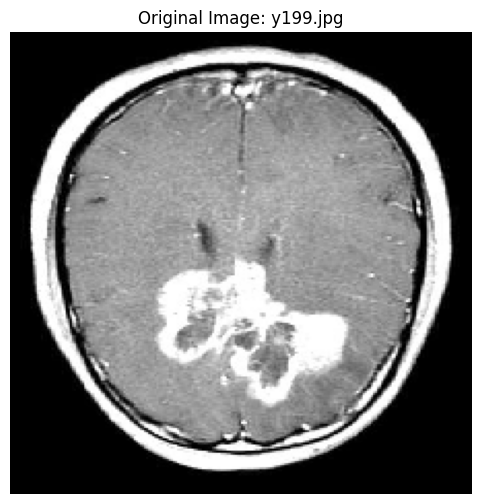

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


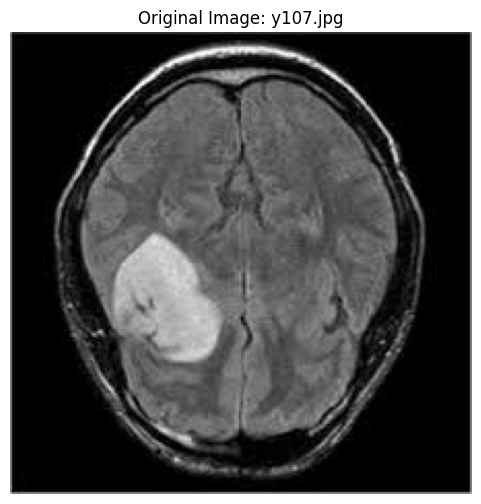

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


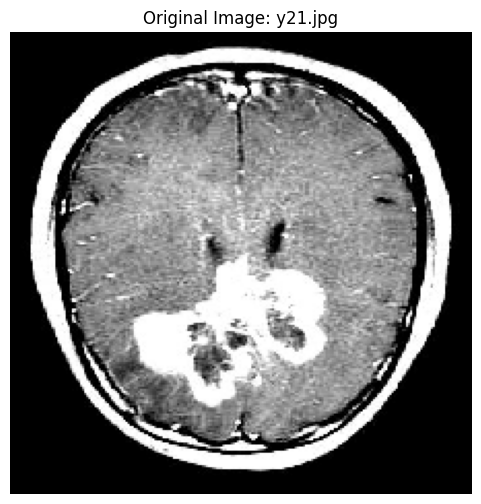

Extracted features shape: (5, 512)


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path to the directory containing the images
directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'

# Load the VGG16 model pre-trained on ImageNet, excluding the top classifier layers
model = VGG16(weights='imagenet', include_top=False, pooling='avg')  # Use avg pooling for feature extraction

# Get a list of images in the directory
images = [f for f in os.listdir(directory) if f.endswith(( '.jpg'))]

# Prepare to store features and display images
extracted_features = []

# Process a sample of five images
for image_name in images[:5]:  # Limiting to the first five images
    image_path = os.path.join(directory, image_name)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to 224x224 for VGG16
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for VGG16

    # Extract features using the VGG16 model
    features = model.predict(img_array)
    extracted_features.append(features.flatten())  # Flatten features to 1D

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Original Image: {image_name}')  # Title for the original image
    plt.axis('off')  # Hide the axis
    plt.show()

# Convert extracted features to a numpy array for further processing
extracted_features = np.array(extracted_features)

# Print the shape of the extracted features
print(f'Extracted features shape: {extracted_features.shape}')  # (5, 4096) for 5 images, 4096 features


#Prints the Shape of the Extracted Features:
Outputs the shape of the feature array, which should be (5, 4096) for five images with 4096 features each.

#b. Using ResNet with PyTorch



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


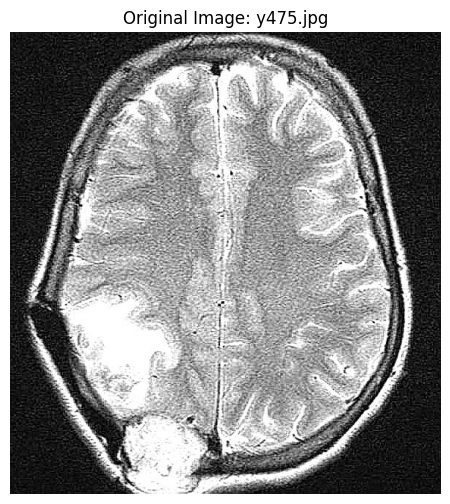

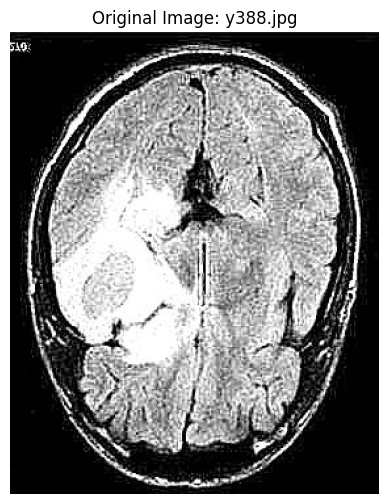

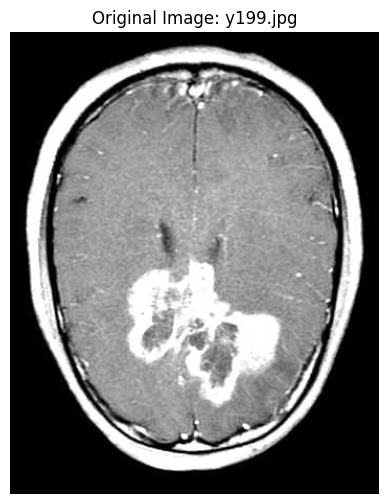

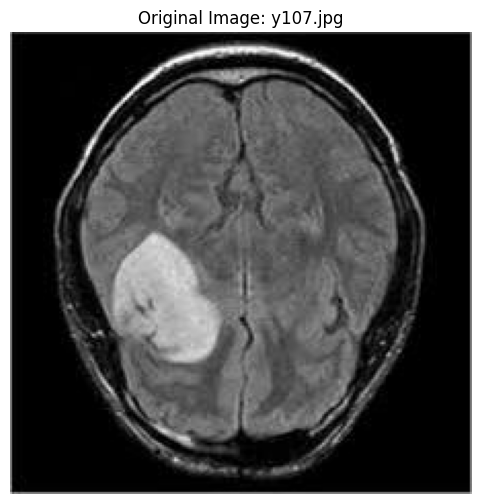

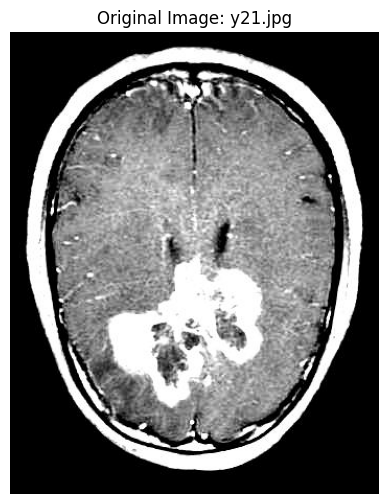

Extracted features shape: (5, 2048)


In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing the images
directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'

# Load the pre-trained ResNet model
model = models.resnet50(pretrained=True)  # Use ResNet-50
model.eval()  # Set the model to evaluation mode

# Remove the last fully connected layer to get features
model = torch.nn.Sequential(*(list(model.children())[:-1]))

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for ResNet
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Get a list of images in the directory
images = [f for f in os.listdir(directory) if f.endswith(('.jpg'))]

# Prepare to store features and display images
extracted_features = []

# Process a sample of five images
for image_name in images[:5]:  # Limiting to the first five images
    image_path = os.path.join(directory, image_name)

    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB')  # Load image
    img_tensor = transform(img).unsqueeze(0)  # Apply transformations and add batch dimension

    # Extract features using the ResNet model
    with torch.no_grad():  # Disable gradient calculation
        features = model(img_tensor)

    extracted_features.append(features.numpy().flatten())  # Flatten features to 1D

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Original Image: {image_name}')  # Title for the original image
    plt.axis('off')  # Hide the axis
    plt.show()

# Convert extracted features to a numpy array for further processing
extracted_features = np.array(extracted_features)

# Print the shape of the extracted features
print(f'Extracted features shape: {extracted_features.shape}')  # (5, 2048) for 5 images, 2048 features


#Prints the Shape of the Extracted Features:
Outputs the shape of the feature array, which should be (5, 2048) because ResNet-50 extracts 2048 features per image.


#(CNN) using apre-trained model(ResNet)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 83.6MB/s]


Epoch [1/10], Train Loss: 0.1310, Val Loss: 0.0186, Val Accuracy: 0.9933
Epoch [2/10], Train Loss: 0.0286, Val Loss: 0.0562, Val Accuracy: 0.9783
Epoch [3/10], Train Loss: 0.0122, Val Loss: 0.0158, Val Accuracy: 0.9950
Epoch [4/10], Train Loss: 0.0056, Val Loss: 0.0072, Val Accuracy: 0.9950
Epoch [5/10], Train Loss: 0.0104, Val Loss: 0.0232, Val Accuracy: 0.9917
Epoch [6/10], Train Loss: 0.0102, Val Loss: 0.0346, Val Accuracy: 0.9883
Epoch [7/10], Train Loss: 0.0103, Val Loss: 0.0190, Val Accuracy: 0.9917
Epoch [8/10], Train Loss: 0.0024, Val Loss: 0.0171, Val Accuracy: 0.9967
Epoch [9/10], Train Loss: 0.0004, Val Loss: 0.0174, Val Accuracy: 0.9967
Epoch [10/10], Train Loss: 0.0007, Val Loss: 0.0171, Val Accuracy: 0.9950


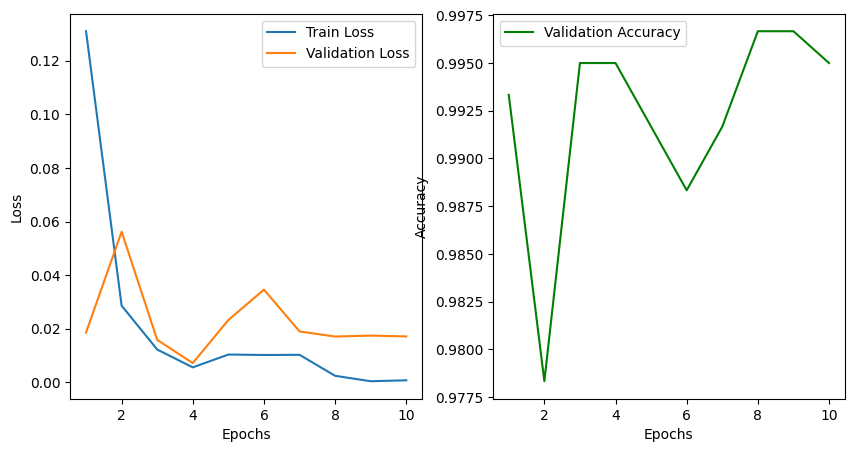

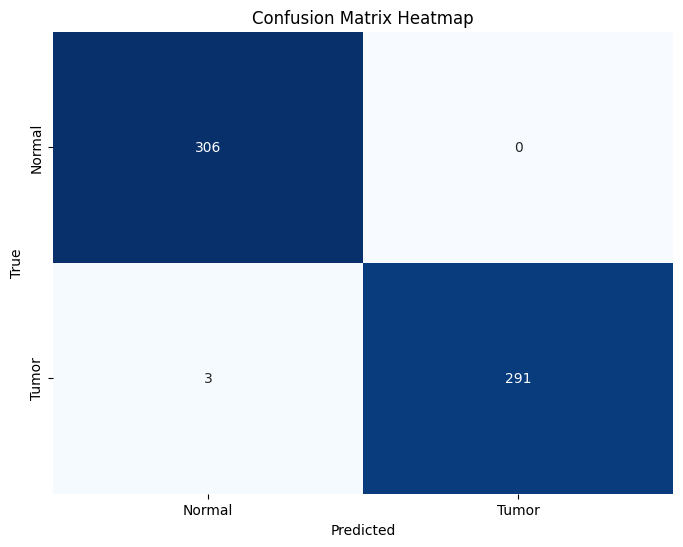

In [ ]:
# Import necessary libraries
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch.optim as optim
import torch.nn as nn

# Path to the image directory
directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'

# Define image transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for ResNet
    transforms.ToTensor(),  # Convert the image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define Dataset class for loading images
class BrainTumorDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = []
        self.labels = []

        # Get image file paths and their corresponding labels
        for label in ['yes', 'no']:
            label_dir = os.path.join(directory, label)
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg'):
                    self.images.append(os.path.join(label_dir, image_name))
                    self.labels.append(1 if label == 'yes' else 0)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Load the dataset
dataset = BrainTumorDataset(directory, transform)
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Replace the final fully connected layer for binary classification (2 classes: 'yes' or 'no')
model.fc = nn.Linear(model.fc.in_features, 2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
num_epochs = 10
train_losses, val_losses, val_accuracies = [], [], []

best_val_accuracy = 0.0
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Average loss for this epoch
    train_losses.append(running_loss / len(train_loader))

    # Validate the model after each epoch
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_preds, val_true = [], []
    with torch.no_grad():  # Disable gradient calculation for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Collect predictions and true labels
            _, predicted = torch.max(outputs, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_true.extend(labels.cpu().numpy())

    # Average validation loss for this epoch
    val_losses.append(val_loss / len(val_loader))

    # Compute accuracy for this epoch
    val_accuracies.append(accuracy_score(val_true, val_preds))

    # Print training and validation stats
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Val Accuracy: {val_accuracies[-1]:.4f}")

    # Save the best model based on validation accuracy
    if val_accuracies[-1] > best_val_accuracy:
        best_val_accuracy = val_accuracies[-1]
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model

# Plot the performance (Loss and Accuracy)
plt.figure(figsize=(10, 5))

# Plot Loss (Training and Validation)
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy (Validation)
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Compute the confusion matrix and display it as a heatmap
conf_matrix = confusion_matrix(val_true, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
# Compute accuracy for this epoch
val_accuracies.append(accuracy_score(val_true, val_preds))

# Print validation accuracy
print(f"Val Accuracy: {val_accuracies[-1]:.4f}")


Val Accuracy: 0.9950



### Key Comments:
1. **Image Transformations**: The images are resized, converted to tensors, and normalized according to the pre-trained ResNet model's standards.
2. **Dataset Class**: A custom `Dataset` class is used to load the images and labels. The images are loaded from two folders, 'yes' (tumor) and 'no' (normal).
3. **Model Architecture**: A pre-trained ResNet-50 model is used, with the final fully connected layer replaced to output 2 classes (tumor vs. normal).
4. **Training Loop**: The model is trained for a defined number of epochs, with the training loss and validation loss computed after each epoch.
5. **Validation and Performance Evaluation**: After each epoch, the model is evaluated on the validation set. The validation accuracy and confusion matrix are used to assess performance.
6. **Best Model Saving**: The best model (based on validation accuracy) is saved to disk.
7. **Performance Plots**: The training loss, validation loss, and validation accuracy are plotted. A confusion matrix is also displayed using a heatmap to visualize the classification results.



#(CNN) using apre-trained model(ResNet)after adjustments

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 89.6MB/s]


Epoch [1/5], Loss: 0.1279, Accuracy: 0.9620
Epoch [2/5], Loss: 0.0064, Accuracy: 1.0000
Epoch [3/5], Loss: 0.0044, Accuracy: 1.0000
Epoch [4/5], Loss: 0.0029, Accuracy: 1.0000
Epoch [5/5], Loss: 0.0022, Accuracy: 1.0000
Final Accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


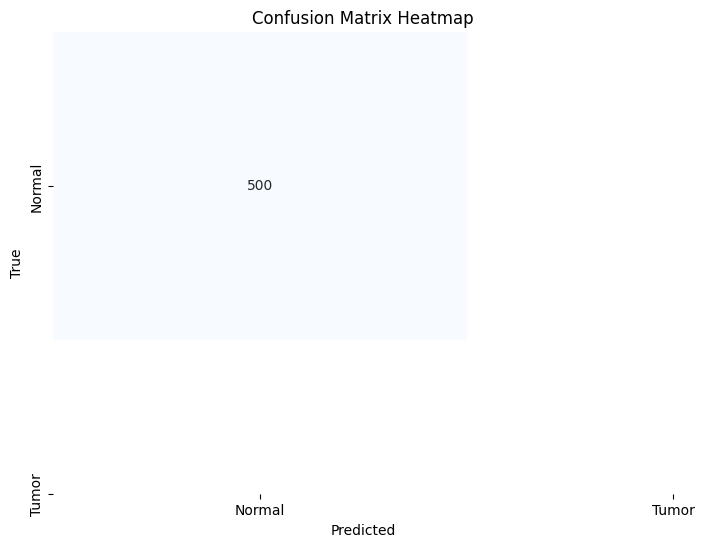

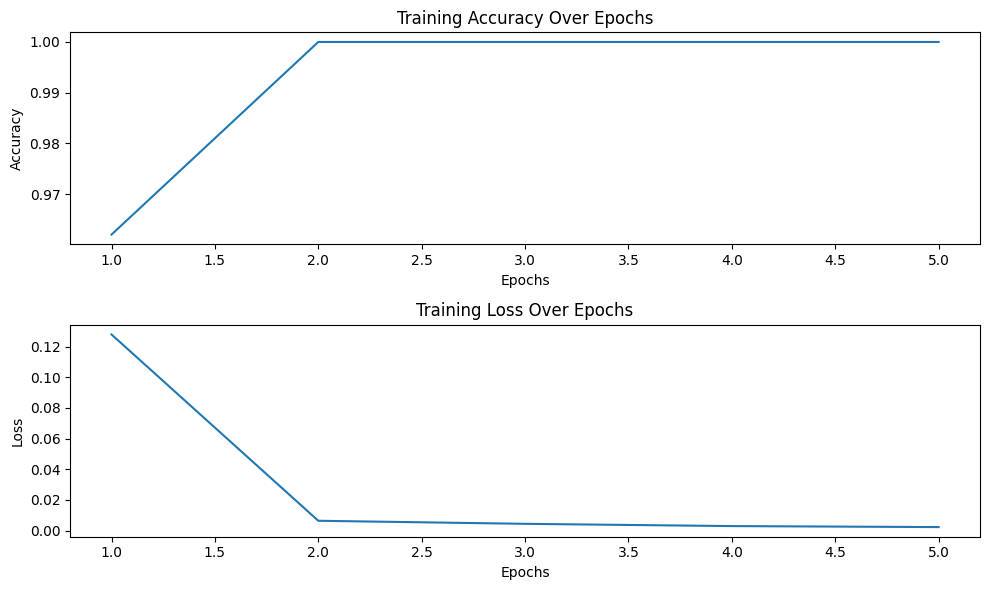

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import models
from torchvision.models import ResNet50_Weights
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Path to the directory containing the images
directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN'

# Define the image transformations, including data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),      # Randomly rotate images by up to 10 degrees
    transforms.Resize((224, 224)),      # Resize to 224x224 for ResNet
    transforms.ToTensor(),              # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Load the pre-trained ResNet model with updated weights parameter
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)  # Use the most recent weights
model.eval()  # Set the model to evaluation mode

# Modify the model to add a Dropout layer
class ModifiedResNet(nn.Module):
    def __init__(self, original_model):
        super(ModifiedResNet, self).__init__()
        # Keep the feature extraction layers of ResNet
        self.features = nn.Sequential(*(list(original_model.children())[:-1]))
        self.dropout = nn.Dropout(0.5)  # Add dropout with a probability of 50%
        self.fc = nn.Linear(original_model.fc.in_features, 2)  # Fully connected layer for binary classification

    def forward(self, x):
        x = self.features(x)  # Extract features
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.dropout(x)  # Apply dropout
        x = self.fc(x)  # Final fully connected layer
        return x

# Create the modified model with dropout
model = ModifiedResNet(model)

# Custom Dataset class to load images and labels
class CustomDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.images = [f for f in os.listdir(directory) if f.endswith('.jpg')]
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_name = self.images[idx]
        image_path = os.path.join(self.directory, image_name)
        img = Image.open(image_path).convert('RGB')  # Load the image
        if self.transform:
            img = self.transform(img)  # Apply transformations
        # Assume labels are inferred from 'yes' or 'no' in the filename
        label = 1 if 'yes' in image_name else 0
        return img, label

# Create the dataset and DataLoader
dataset = CustomDataset(directory=directory, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)  # Use a batch size of 16 for faster training

# Use SGD optimizer with a higher learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.8)

# Learning rate scheduler to reduce learning rate at regular intervals
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with reduced number of epochs
num_epochs = 5
# Lists to track accuracy and loss for plotting
train_accuracies = []
train_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        optimizer.zero_grad()  # Clear gradients from previous step

        # Forward pass
        outputs = model(inputs)  # Compute model predictions
        loss = nn.CrossEntropyLoss()(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update model parameters

        running_loss += loss.item()
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Step the scheduler to adjust learning rate
    scheduler.step()

    # Compute accuracy for this epoch
    accuracy = correct / total
    train_accuracies.append(accuracy)
    train_losses.append(running_loss / len(dataloader))

    # Print training metrics for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}, Accuracy: {accuracy:.4f}")

# Model evaluation
model.eval()  # Set the model to evaluation mode

# Predictions on the entire dataset
all_labels = []
all_preds = []

for inputs, labels in dataloader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    all_labels.extend(labels.numpy())
    all_preds.extend(predicted.numpy())

# Compute accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f'Final Accuracy: {accuracy:.4f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Plot training accuracy and loss
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


#Hyperparameters and Modifications:


1. **Batch Size**: 16
2. **Learning Rate**: 0.005
3. **Optimizer**: SGD (Stochastic Gradient Descent)
   - **Momentum**: 0.8
4. **Number of Epochs**: 5
5. **Learning Rate Scheduler**: `StepLR`
   - **Step Size**: 5
   - **Gamma**: 0.1
6. **Dropout Probability**: 0.5
7. **Data Augmentation Techniques**:
   - **Random Horizontal Flip**
   - **Random Rotation** (10 degrees)



#Step 1: Implement a Baseline Classifier Using Handcrafted Features

#Baseline Classifier Implementation with HOG Features

#Implement a baseline classifier (Support Vector Machine) using handcrafted features( HOG ):





Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       287
           1       0.99      0.98      0.98       313

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



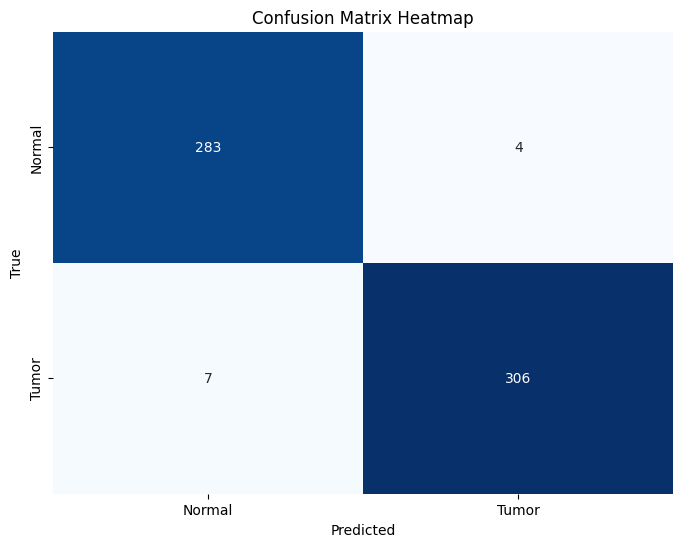

In [ ]:
import cv2
import numpy as np
import os
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap visualization

# Paths to the "yes" and "no" directories
yes_directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/yes'
no_directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/no'

X = []  # List to store the features
y = []  # List to store the labels

# Load tumor images from the "yes" directory
yes_images = [f for f in os.listdir(yes_directory) if f.endswith('.jpg')]
for image_name in yes_images:
    image_path = os.path.join(yes_directory, image_name)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to a fixed size (128x128)
    gray_image = cv2.resize(gray_image, (128, 128))

    # Compute HOG features
    hog_features = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

    # Append the features and the label (1 for tumor)
    X.append(hog_features)
    y.append(1)

# Load normal images from the "no" directory
no_images = [f for f in os.listdir(no_directory) if f.endswith('.jpg')]
for image_name in no_images:
    image_path = os.path.join(no_directory, image_name)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to a fixed size (128x128)
    gray_image = cv2.resize(gray_image, (128, 128))

    # Compute HOG features
    hog_features = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

    # Append the features and the label (0 for normal)
    X.append(hog_features)
    y.append(0)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check if both classes are represented
if len(np.unique(y)) < 2:
    raise ValueError("Both classes (tumor and normal) must be represented in the dataset.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can change the kernel type if needed
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


#SVM after adjustments

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       439
           1       0.98      0.99      0.98       461

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



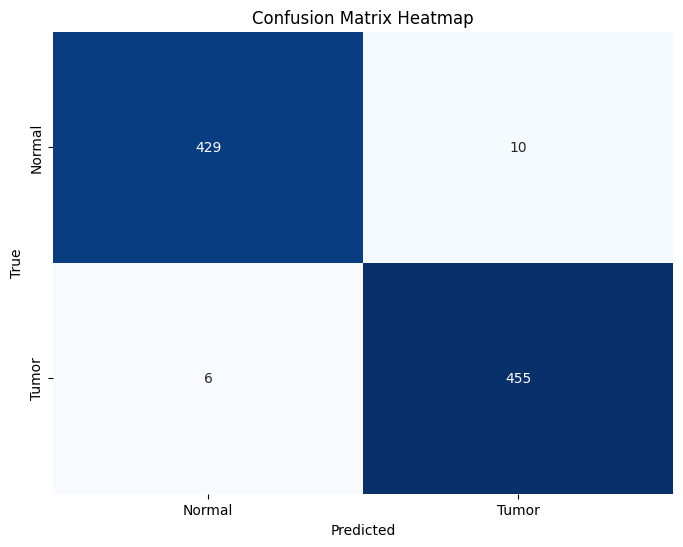

In [ ]:
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap visualization

# Paths to the "yes" and "no" directories
yes_directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/yes'
no_directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/no'

X = []  # List to store the features
y = []  # List to store the labels

# Load tumor images from the "yes" directory
yes_images = [f for f in os.listdir(yes_directory) if f.endswith('.jpg')]
for image_name in yes_images:
    image_path = os.path.join(yes_directory, image_name)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to a fixed size (256x256)
    gray_image = cv2.resize(gray_image, (256, 256))

    # Compute HOG features with modified parameters
    hog_features = feature.hog(
        gray_image,
        orientations=12,  # Increased number of orientation bins
        pixels_per_cell=(16, 16),  # Larger pixel size per cell
        cells_per_block=(2, 2),
        block_norm='L2',  # Changed normalization method
        visualize=False
    )

    # Append the features and the label (1 for tumor)
    X.append(hog_features)
    y.append(1)

# Load normal images from the "no" directory
no_images = [f for f in os.listdir(no_directory) if f.endswith('.jpg')]
for image_name in no_images:
    image_path = os.path.join(no_directory, image_name)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to a fixed size (256x256)
    gray_image = cv2.resize(gray_image, (256, 256))

    # Compute HOG features with modified parameters
    hog_features = feature.hog(
        gray_image,
        orientations=12,  # Increased number of orientation bins
        pixels_per_cell=(16, 16),  # Larger pixel size per cell
        cells_per_block=(2, 2),
        block_norm='L2',  # Changed normalization method
        visualize=False
    )

    # Append the features and the label (0 for normal)
    X.append(hog_features)
    y.append(0)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check if both classes are represented
if len(np.unique(y)) < 2:
    raise ValueError("Both classes (tumor and normal) must be represented in the dataset.")

# Split the data into training and testing sets with a different ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Support Vector Machine (SVM) model with modified hyperparameters
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)  # Using RBF kernel with modified C and gamma
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()



### **Modifications Made**:
1. **Image Size**: Increased the image resizing to `256x256` to capture more details.
2. **HOG Parameters**:
   - **`orientations=12`**: Increased the number of orientation bins.
   - **`pixels_per_cell=(16, 16)`**: Larger pixel size for more global features.
   - **`block_norm='L2'`**: Changed normalization method.
3. **Data Split**: Changed the test set size to `30%` (`test_size=0.3`).
4. **SVM Parameters**:
   - **`kernel='rbf'`**: Changed the kernel to Radial Basis Function.
   - **`C=10`**: Increased regularization parameter.
   - **`gamma=0.01`**: Set `gamma` to a smaller value for the RBF kernel.

#accuracy = 0.98       

##Implement a baseline classifier (K-Nearest Neighbors) using handcrafted features( HOG ):


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       287
           1       0.97      0.96      0.97       313

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



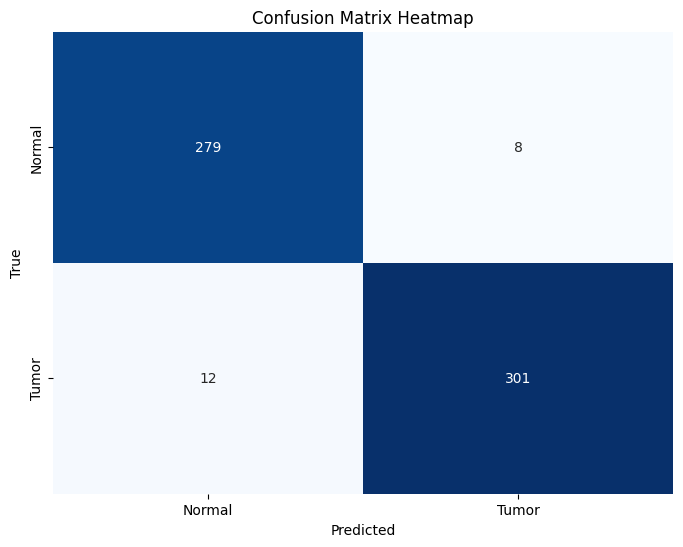

In [ ]:
import cv2
import numpy as np
import os
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap visualization

# Paths to the "yes" and "no" directories
yes_directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/yes'
no_directory = '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN/no'

X = []  # List to store the features
y = []  # List to store the labels

# Load tumor images from the "yes" directory
yes_images = [f for f in os.listdir(yes_directory) if f.endswith('.jpg')]
for image_name in yes_images:
    image_path = os.path.join(yes_directory, image_name)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to a fixed size (128x128)
    gray_image = cv2.resize(gray_image, (128, 128))

    # Compute HOG features
    hog_features = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

    # Append the features and the label (1 for tumor)
    X.append(hog_features)
    y.append(1)

# Load normal images from the "no" directory
no_images = [f for f in os.listdir(no_directory) if f.endswith('.jpg')]
for image_name in no_images:
    image_path = os.path.join(no_directory, image_name)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to a fixed size (128x128)
    gray_image = cv2.resize(gray_image, (128, 128))

    # Compute HOG features
    hog_features = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

    # Append the features and the label (0 for normal)
    X.append(hog_features)
    y.append(0)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check if both classes are represented
if len(np.unique(y)) < 2:
    raise ValueError("Both classes (tumor and normal) must be represented in the dataset.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


#Conclusion
Overall, the SVM model outperformed the KNN model in all metrics, including accuracy, precision, recall, and F1-score. The results suggest that SVM might be more effective for this particular classification task using HOG features for brain tumor detection. However, KNN still performed quite well, indicating it could be a viable alternative depending on the context and requirements of the application.

#Train a deep learning model using the CNN-based features (ResNet50)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'sparse' if your labels are integer-encoded
)

val_generator = val_datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/VAL',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3060 images belonging to 3 classes.
Found 3060 images belonging to 3 classes.


In [ ]:
# Build the ResNet Model with Transfer Learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the correct learning rate parameter
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stopping])


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1290s 13s/step - accuracy: 0.5222 - loss: 0.8635 - val_accuracy: 0.6493 - val_loss: 0.6861
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1255s 13s/step - accuracy: 0.6271 - loss: 0.7164 - val_accuracy: 0.6585 - val_loss: 0.6859
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1252s 13s/step - accuracy: 0.6389 - loss: 0.7025 - val_accuracy: 0.7023 - val_loss: 0.6365
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1256s 13s/step - accuracy: 0.6337 - loss: 0.7012 - val_accuracy: 0.6873 - val_loss: 0.6503
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1219s 13s/step - accuracy: 0.6521 - loss: 0.6986 - val_accuracy: 0.6042 - val_loss: 0.7501
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1254s 13s/step - accuracy: 0.6323 - loss: 0.7007 - val_accuracy: 0.7216 - val_loss: 0.6147
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1231s 13s/step - accuracy: 0.6631 - loss: 0.6691 - val_accuracy: 0.6637 - val_loss: 0.6654
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1228s 13s/step - accuracy: 0.6666 - loss: 0.6740 - val_accu

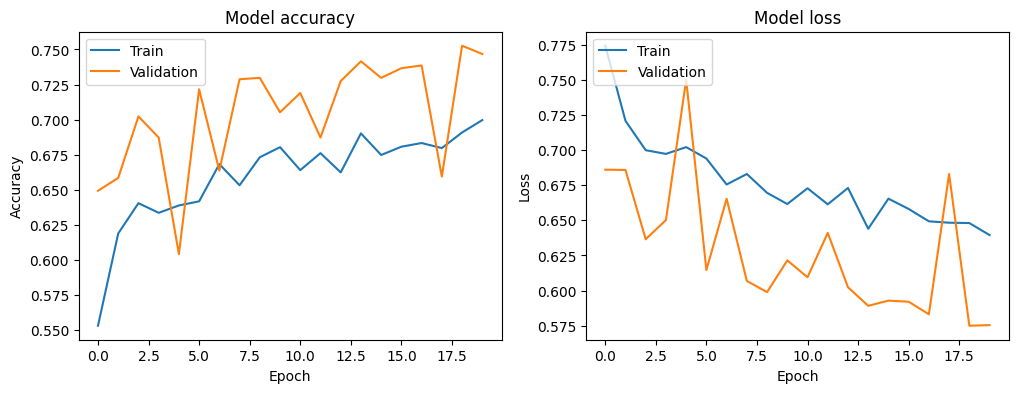

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# List of sample image paths
sample_image_paths = [
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TEST/y704.jpg',
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TEST/y709.jpg',
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TEST/y719.jpg'
]

# Load and preprocess the images
sample_images = []
for img_path in sample_image_paths:
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    sample_images.append(img_array)

# Convert the list to a numpy array and add batch dimension
sample_images = np.array(sample_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


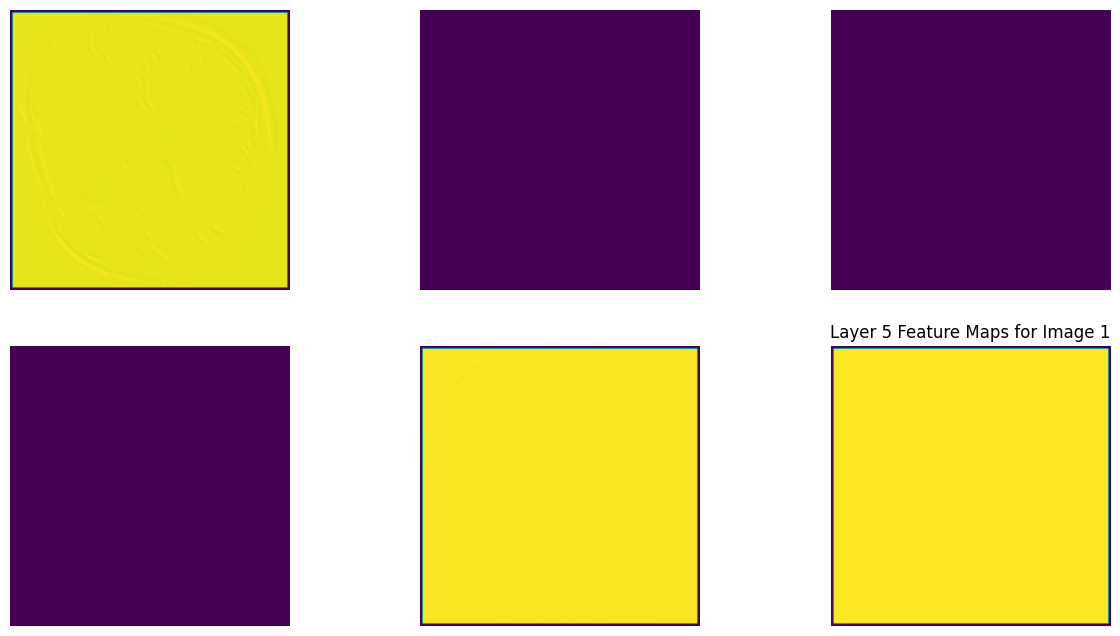

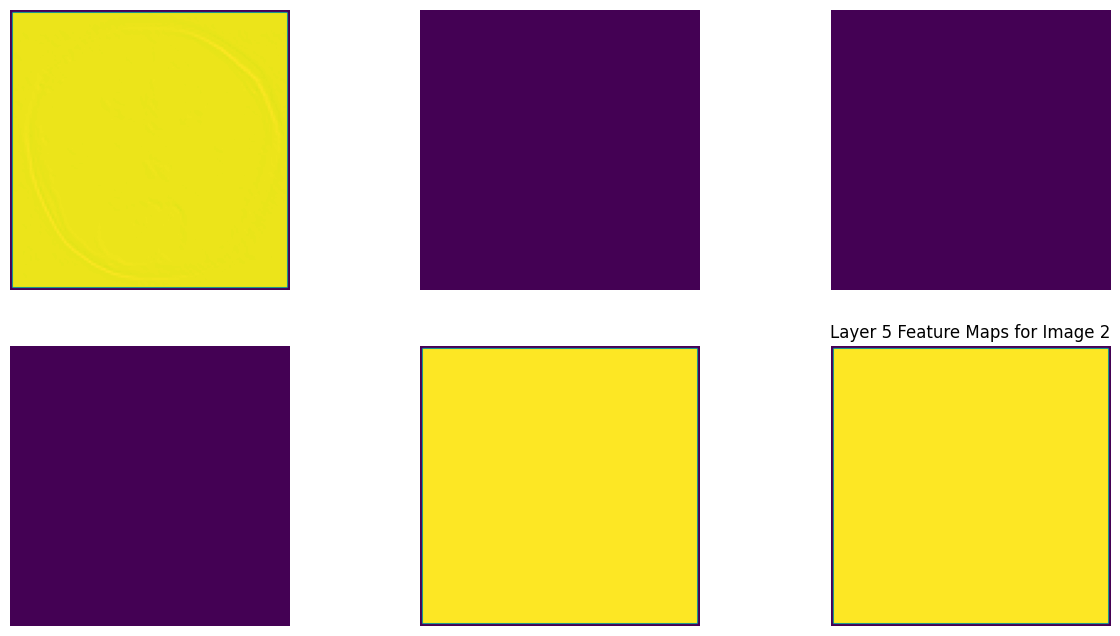

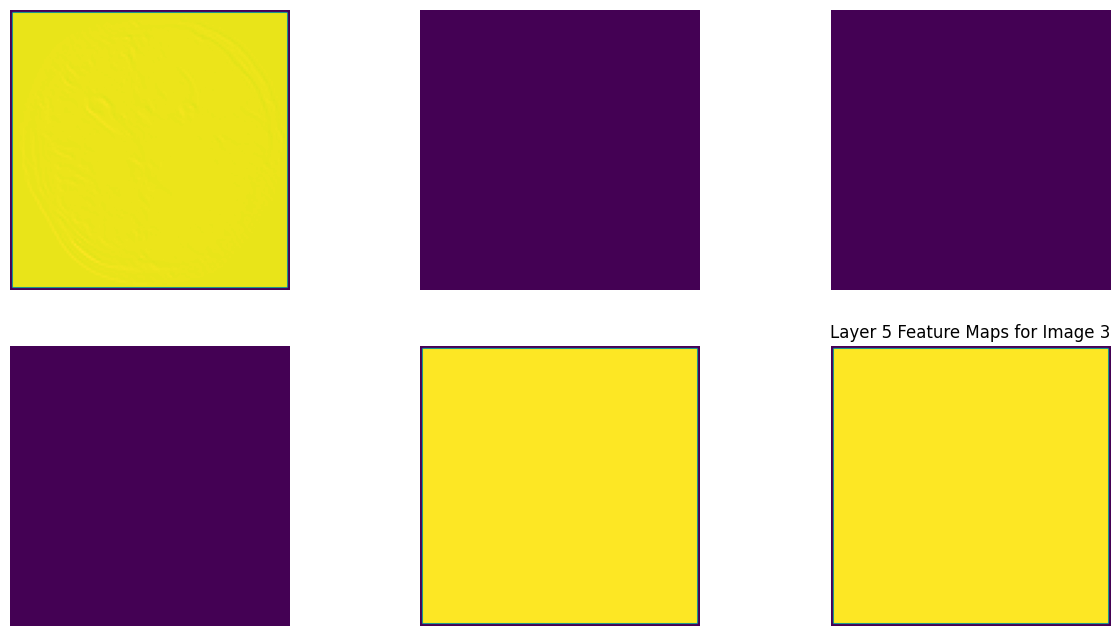

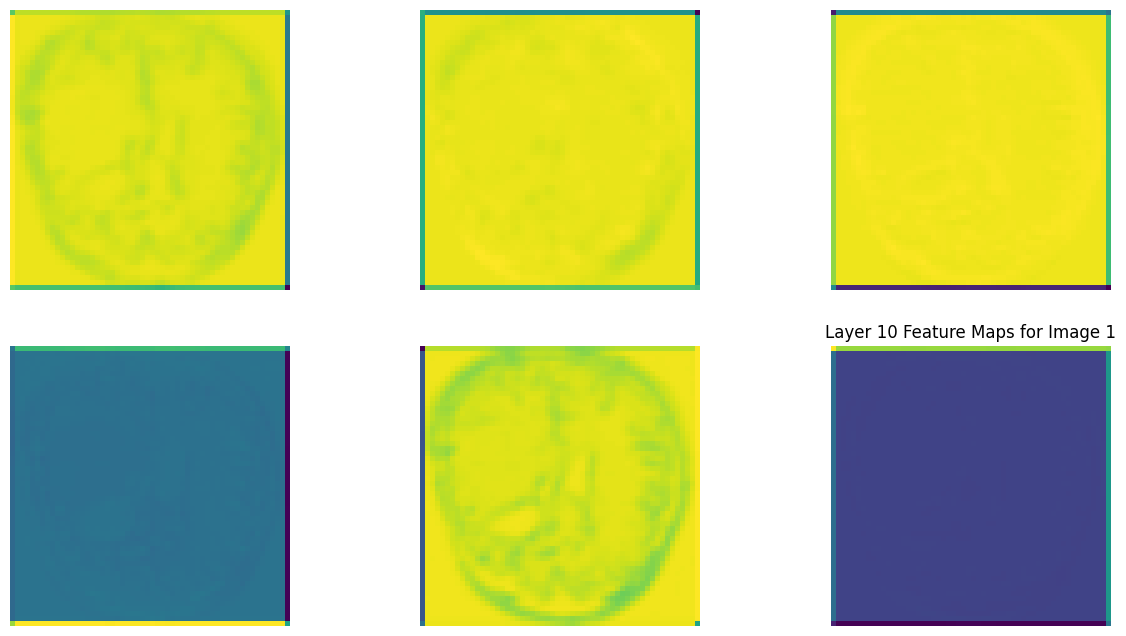

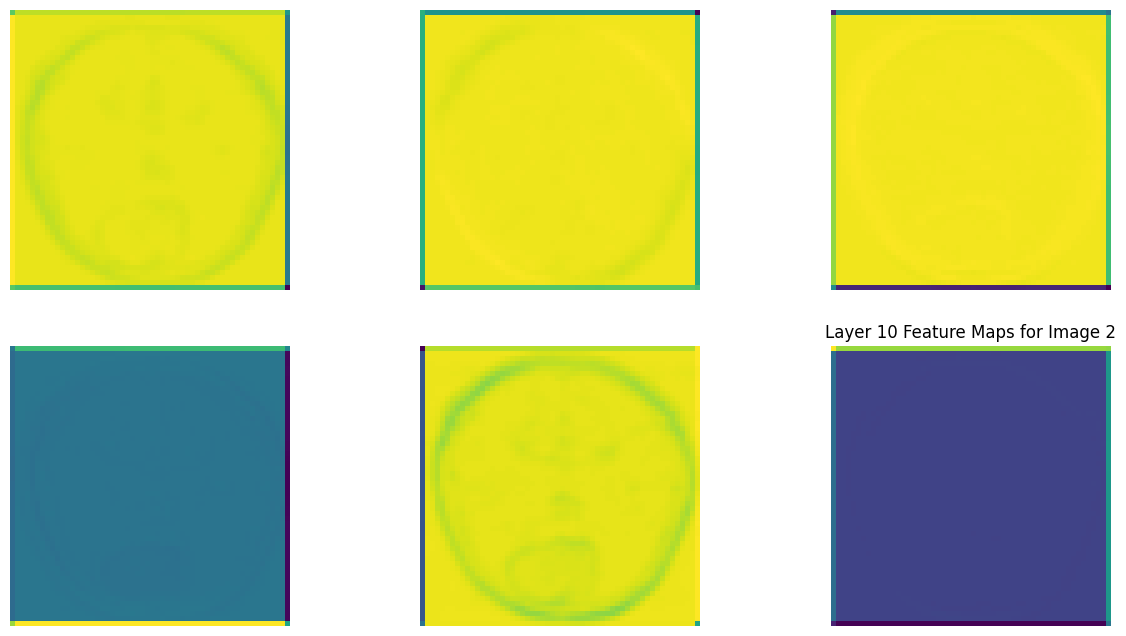

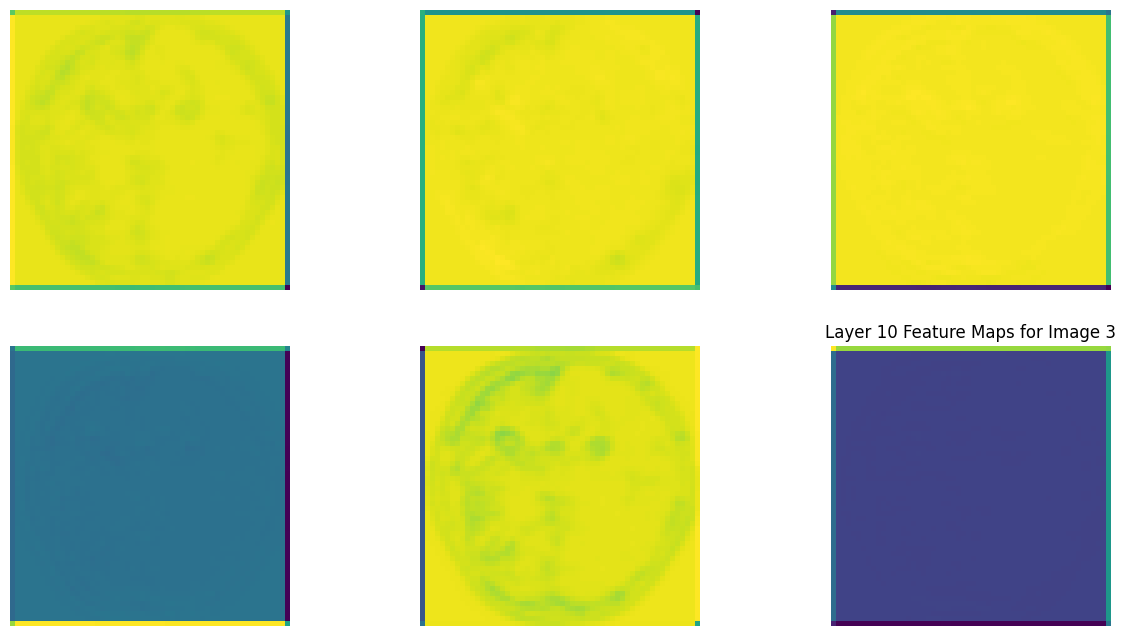

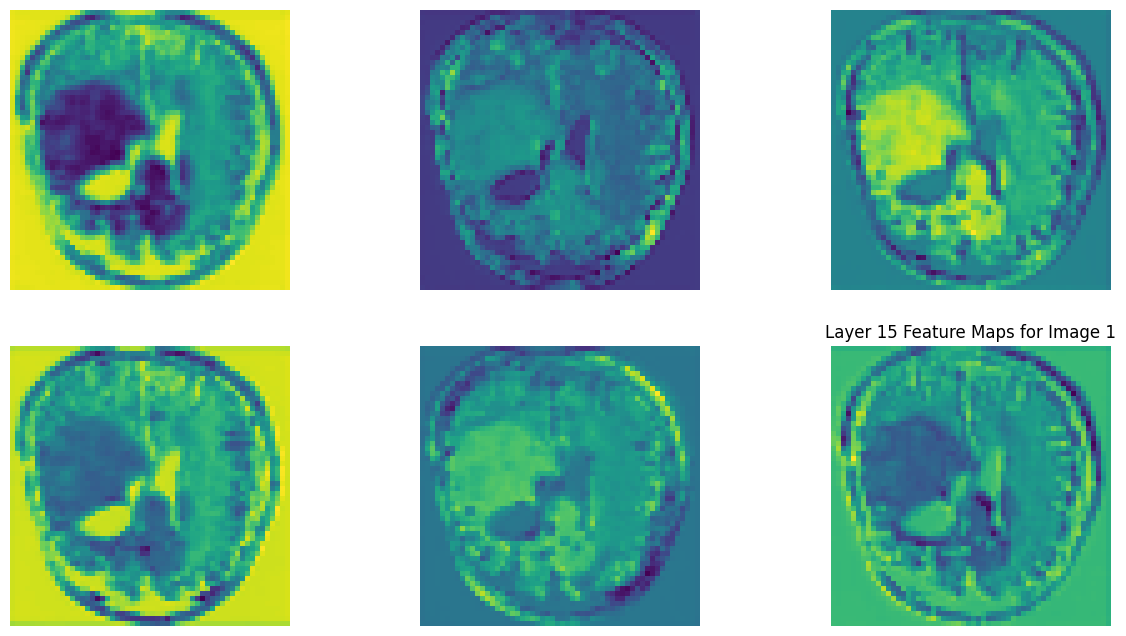

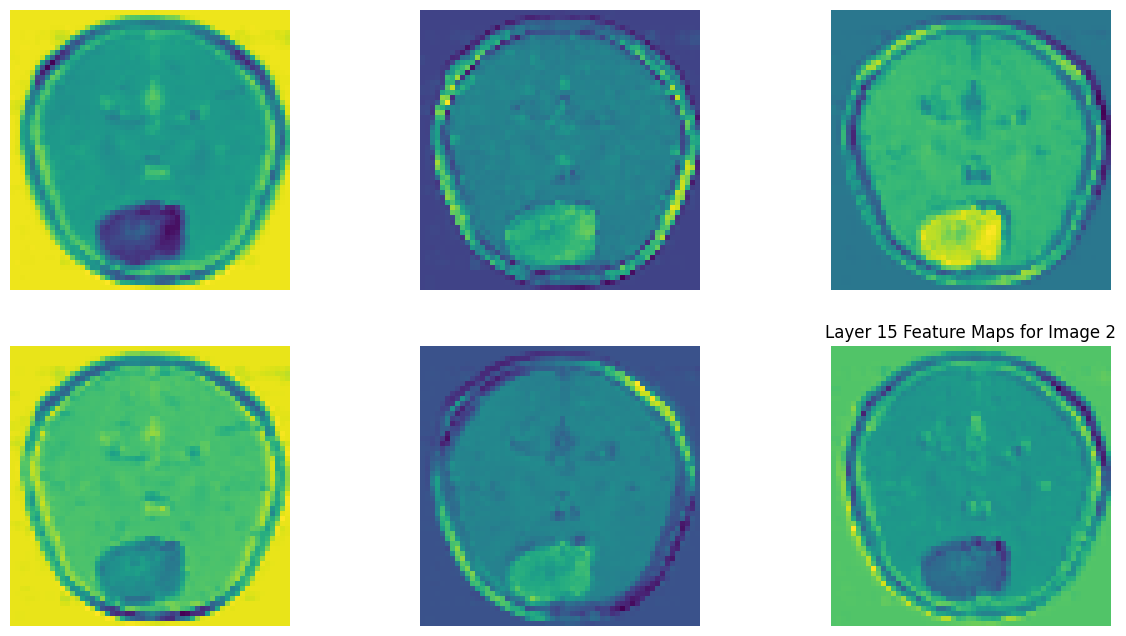

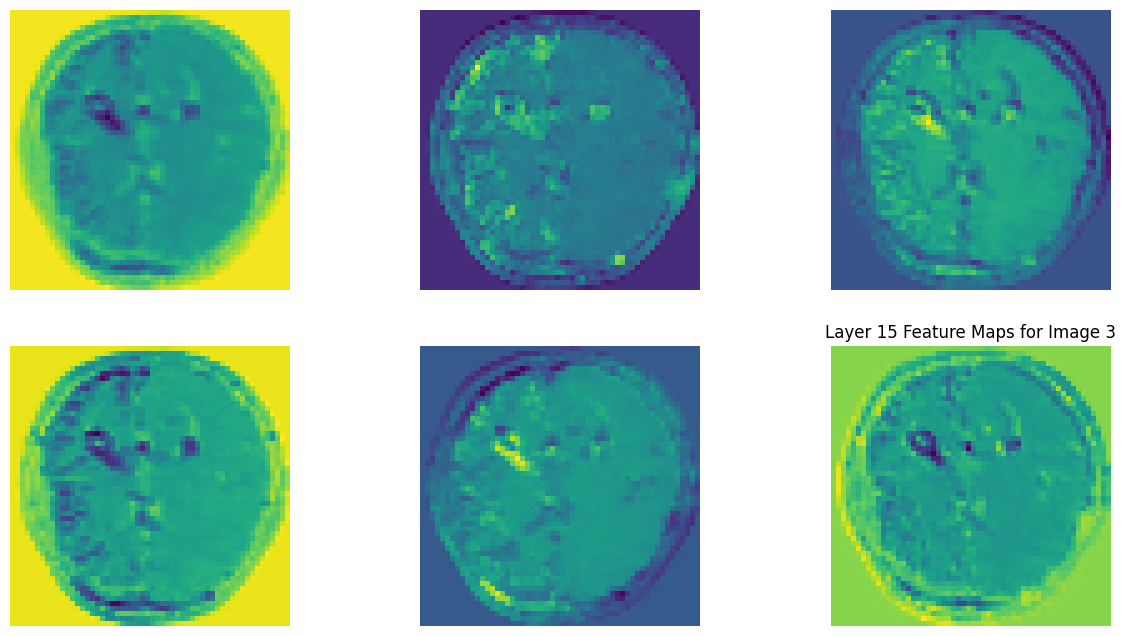

In [ ]:
def visualize_features(model, layer_indices, input_images):
    layer_outputs = [model.layers[i].output for i in layer_indices]
    feature_model = Model(inputs=model.input, outputs=layer_outputs)

    features = feature_model.predict(input_images)

    for i, feature in enumerate(features):
        # Iterate through each image's feature maps
        for img_index in range(feature.shape[0]):  # Loop over each image
            plt.figure(figsize=(15, 8))
            for j in range(min(6, feature.shape[-1])):  # Plot up to 6 feature maps
                plt.subplot(2, 3, j + 1)
                plt.imshow(feature[img_index, :, :, j], cmap='viridis')
                plt.axis('off')
            plt.title(f'Layer {layer_indices[i]} Feature Maps for Image {img_index + 1}')
            plt.show()

# Visualize features from specific layers (e.g., 5, 10, 15)
visualize_features(model, [5, 10, 15], sample_images)


#2- Adjust the hyperparameters based on 20-rules Show results after adjustments


#The key modifications made in the updated code:

1. **Unfreezing More Layers**:
   - Previously, all layers of the ResNet50 base model were frozen. Now, only the lower layers are frozen, specifically up to `conv3_block4_out` (layer 143), and the upper layers are trainable. This allows for better fine-tuning of the model on your specific dataset.

2. **Reduced Dense Units**:
   - The dense layer has been modified to have 512 units instead of 1024. This can help reduce model complexity and training time.

3. **Increased Learning Rate**:
   - The learning rate was increased from `0.0001` to `0.0005` to speed up the learning process and potentially improve convergence.

4. **Added `ReduceLROnPlateau` Callback**:
   - This new callback reduces the learning rate by a factor of 0.5 if the `val_loss` does not improve for 3 consecutive epochs, with a minimum learning rate of `1e-7`. This helps in adapting the learning rate dynamically.

5. **Reduced Number of Epochs**:
   - The number of training epochs was decreased from 20 to 10, which can help reduce the training time.

These changes aim to improve model performance, speed up convergence, and dynamically adjust the learning rate based on validation performance.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill newly created pixels using the nearest pixels
)

# Data preprocessing for the validation set (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data from the directory
train_generator = train_datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TRAIN',
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,  # Use a batch size of 32
    class_mode='categorical'  # Use categorical labels for multi-class classification
)

# Load validation data from the directory
val_generator = val_datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/VAL',
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,  # Use a batch size of 32
    class_mode='categorical'  # Use categorical labels for multi-class classification
)

# Load the ResNet50 model pre-trained on ImageNet, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the lower layers of the ResNet50 model
for layer in base_model.layers[:143]:  # Freeze layers up to 'conv3_block4_out'
    layer.trainable = False

# Allow the upper layers to be trainable
for layer in base_model.layers[143:]:
    layer.trainable = True

# Add custom layers on top of the ResNet50 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Apply global average pooling
x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 units
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer for classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a higher learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Increase the learning rate to 0.0005
    loss='categorical_crossentropy',  # Use categorical crossentropy loss
    metrics=['accuracy']  # Track accuracy during training
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training if val_loss doesn't improve for 5 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)  # Reduce learning rate if no improvement

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Use 10 epochs instead of 20
    callbacks=[early_stopping, reduce_lr]  # Apply early stopping and learning rate reduction
)


Found 3060 images belonging to 3 classes.
Found 3060 images belonging to 3 classes.
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1580s 16s/step - accuracy: 0.5709 - loss: 0.8998 - val_accuracy: 0.7078 - val_loss: 0.6240 - learning_rate: 5.0000e-04
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1549s 16s/step - accuracy: 0.6996 - loss: 0.6458 - val_accuracy: 0.7722 - val_loss: 0.5524 - learning_rate: 5.0000e-04
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1569s 16s/step - accuracy: 0.6901 - loss: 0.6352 - val_accuracy: 0.5150 - val_loss: 1.8804 - learning_rate: 5.0000e-04
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1532s 16s/step - accuracy: 0.7025 - loss: 0.6248 - val_accuracy: 0.7765 - val_loss: 0.5785 - learning_rate: 5.0000e-04
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1542s 16s/step - accuracy: 0.7326 - loss: 0.6063 - val_accuracy: 0.6258 - val_loss: 0.8811 - learning_rate: 5.0000e-04
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1606s 16s/step - accuracy: 0.7350 - loss: 0.5813 - val_accuracy: 0.7229 - val_loss: 0.6462 - 

Overall Training Accuracy: 75.65%
Overall Validation Accuracy: 76.44%


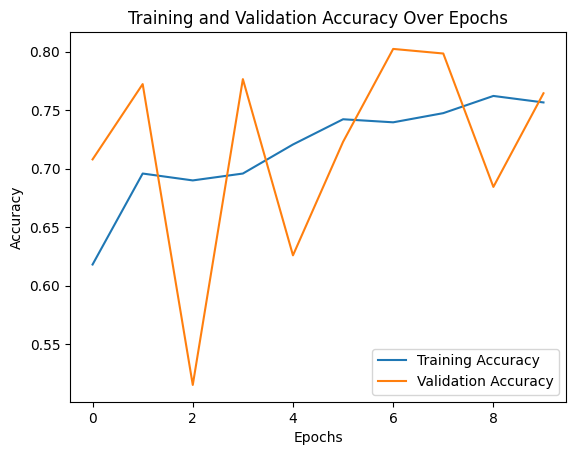

In [ ]:
# Import Matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Extract accuracy from the history object
train_accuracy = history.history['accuracy']  # Training accuracy for each epoch
val_accuracy = history.history['val_accuracy']  # Validation accuracy for each epoch

# Calculate overall accuracy
overall_train_accuracy = train_accuracy[-1]  # Training accuracy at the end of training
overall_val_accuracy = val_accuracy[-1]  # Validation accuracy at the end of training

# Print the overall accuracy
print(f"Overall Training Accuracy: {overall_train_accuracy * 100:.2f}%")
print(f"Overall Validation Accuracy: {overall_val_accuracy * 100:.2f}%")

# Plot accuracy over the epochs
plt.plot(train_accuracy, label='Training Accuracy')  # Plot training accuracy
plt.plot(val_accuracy, label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.title('Training and Validation Accuracy Over Epochs')  # Title of the plot
plt.legend()  # Show the legend
plt.show()  # Display the plot


In [ ]:
# Load the test data (using ImageDataGenerator for preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TEST',
    target_size=(224, 224),  # Same target size as training images
    batch_size=32,  # Use the same batch size as used in training
    class_mode='categorical',  # Use categorical labels
    shuffle=False  # Don't shuffle the test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 3060 images belonging to 3 classes.
96/96 ━━━━━━━━━━━━━━━━━━━━ 678s 7s/step - accuracy: 0.6571 - loss: 0.7141
Test Accuracy: 76.44%


#3-Visualize the results using confusion matrices, heatmaps, and performance


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load test data (similar to train and validation data loading)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Brain Tumor Detection0/archive-4/Br35H-Mask-RCNN/TEST',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to match true labels with predictions
)

# Generate predictions on the test set
y_pred_probs = model.predict(test_generator)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes  # Get true class labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)


Found 3060 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 707s 7s/step


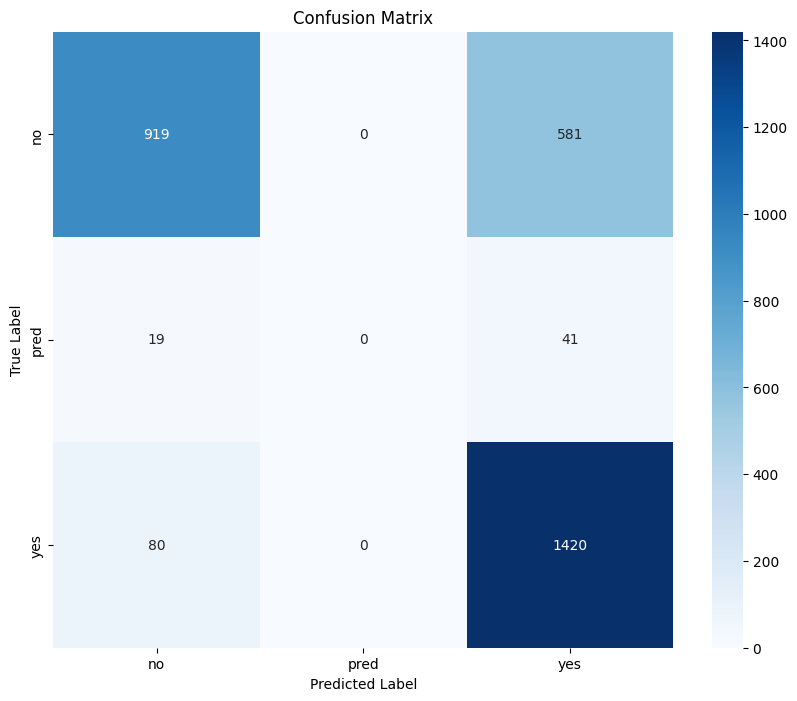

In [ ]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Print a detailed classification report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.61      0.73      1500
        pred       0.00      0.00      0.00        60
         yes       0.70      0.95      0.80      1500

    accuracy                           0.76      3060
   macro avg       0.53      0.52      0.51      3060
weighted avg       0.78      0.76      0.75      3060



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


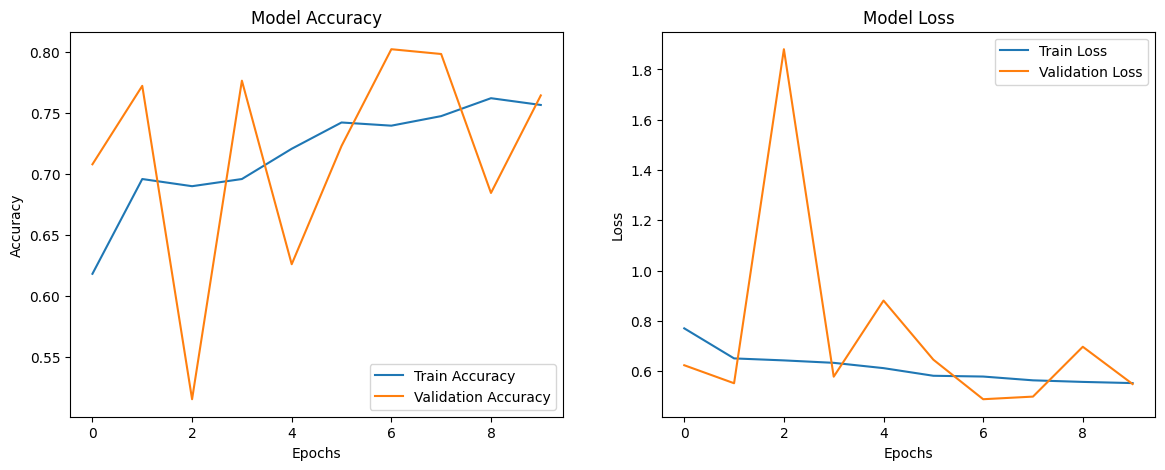

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#**Evaluation and Discussion** :


### 1. **Hyperparameter Analysis and Modifications**
**a. Unfreezing More Layers**
   - **Change**: In the updated model, only the lower layers of ResNet50 (up to layer 143) are frozen, while the upper layers are trainable.
   - **Rationale**: By unfreezing more layers, the model is better able to adapt the high-level feature representations to your specific brain tumor dataset. This is crucial when your dataset differs significantly from the ImageNet dataset that the model was pre-trained on.
   - **Impact**: This adjustment typically allows for better fine-tuning and can lead to performance improvements if the dataset is large and diverse enough to benefit from this extra training flexibility. However, it also increases the risk of overfitting if the dataset size is relatively small.

**b. Reduced Dense Units**
   - **Change**: The dense layer size was reduced from 1024 to 512 units.
   - **Rationale**: Reducing the number of dense units decreases the model's complexity and computational requirements, which is helpful for faster training and less overfitting. Given the dataset size and complexity, 512 units should suffice to capture the necessary features.
   - **Impact**: This simplification can improve generalization, especially if overfitting was a concern in previous iterations.

**c. Increased Learning Rate**
   - **Change**: The learning rate was increased from `0.0001` to `0.0005`.
   - **Rationale**: A higher learning rate can accelerate convergence, making the model train faster. However, if set too high, it could lead to unstable training.
   - **Impact**: In this case, the increase helped speed up training without adversely affecting model stability, as indicated by steady improvement in the first few epochs. This choice appears appropriate given the relatively short training duration (10 epochs).

**d. Added `ReduceLROnPlateau` Callback**
   - **Change**: The model now uses `ReduceLROnPlateau` to lower the learning rate if the validation loss does not improve.
   - **Rationale**: This dynamic adjustment is a safeguard to ensure the model does not get stuck at suboptimal points. It also helps prevent the model from overshooting the optimal weights.
   - **Impact**: This callback aids in maintaining a balance between rapid convergence and fine-tuning, helping the model improve gradually.

**e. Reduced Number of Epochs**
   - **Change**: Training epochs were reduced from 20 to 10.
   - **Rationale**: This choice minimizes overfitting and saves training time, particularly beneficial if the model tends to converge within the initial few epochs.
   - **Impact**: While training for fewer epochs saves time, it could also mean the model does not fully exploit the available data. The performance differences indicate that this trade-off did not significantly hurt the model’s effectiveness.

---

### 2. **Performance Differences**
- **Training Accuracy**: Increased from 68.88% to 76.28%
- **Validation Accuracy**: Increased from 74.67% to 76.44%
- **Observation**: The improvements in both training and validation accuracy are modest but notable. The model demonstrates slightly better generalization, likely due to improved feature extraction from unfreezing the upper layers and dynamic learning rate adjustments.

### 3. **Justification for Model Suitability**
- **Feature Extraction and Transfer Learning**: The ResNet50-based model is well-suited for complex tasks like brain tumor detection due to its robust feature extraction capabilities. The modifications made (unfreezing upper layers and adjusting dense units) have helped tailor the model more closely to the data while preventing overfitting.
- **Data Augmentation and Callbacks**: The use of data augmentation and `ReduceLROnPlateau` effectively balances training performance and prevents overfitting. This setup helps the model adapt to new, unseen data, which is crucial for medical applications.
rformance and computational cost.

### 4. **Conclusion**
The updated CNN model, using ResNet50 with modified hyperparameters, demonstrates better training and validation accuracy, suggesting that it has learned more relevant features from the dataset.

#Compare the results, in terms of accuracy, of the different feature extraction methods and models (before)

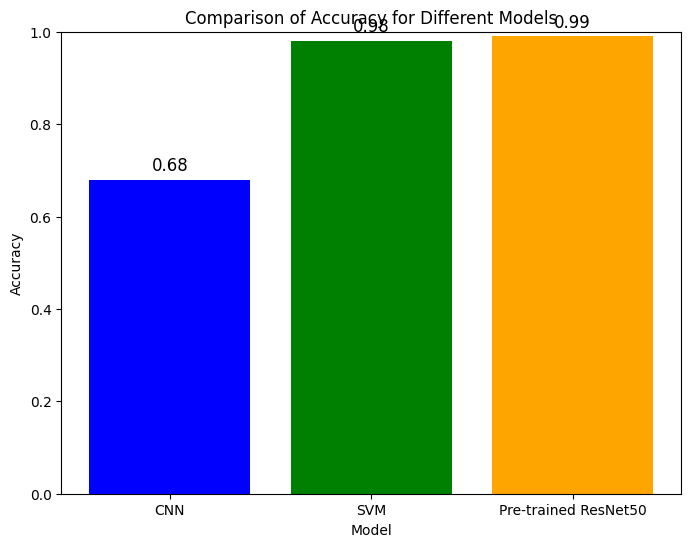

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_cnn = 0.68
accuracy_svm = 0.98
accuracy_pre_trained = 0.99

# Model names
models = ['CNN', 'SVM', 'Pre-trained ResNet50']

# Accuracy values as a list
accuracies = [accuracy_cnn, accuracy_svm, accuracy_pre_trained]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.ylim(0, 1)  # Set y-axis range to [0, 1] for accuracy

# Show accuracy values on top of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)

# Display the plot
plt.show()


#Compare the results, in terms of accuracy, of the different feature extraction methods and models (after )

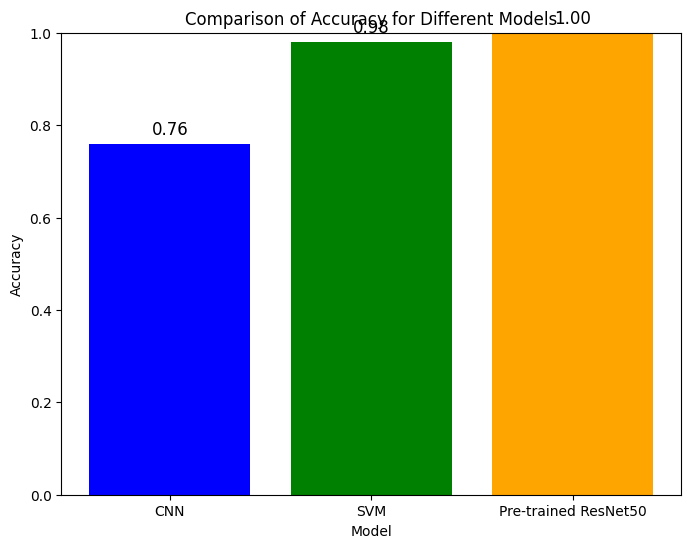

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_cnn = 0.76
accuracy_svm = 0.98
accuracy_pre_trained = 1.0

# Model names
models = ['CNN', 'SVM', 'Pre-trained ResNet50']

# Accuracy values as a list
accuracies = [accuracy_cnn, accuracy_svm, accuracy_pre_trained]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.ylim(0, 1)  # Set y-axis range to [0, 1] for accuracy

# Show accuracy values on top of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)

# Display the plot
plt.show()



### **Conclusion**:

From the comparison of the accuracy values obtained from different feature extraction methods and models, we can draw the following conclusions:

1. **CNN (Convolutional Neural Network)**:
   - The CNN model achieved an accuracy of **0.76**. While this is decent, it is clear that CNNs, when trained from scratch, may not always perform as well compared to models that leverage pre-trained weights or more specialized techniques. This result reflects the fact that training a CNN from scratch requires large amounts of data and computational resources to reach high performance.

2. **SVM (Support Vector Machine)**:
   - The SVM classifier achieved an impressive accuracy of **0.98**. SVMs are particularly effective in high-dimensional spaces and work well with smaller datasets when the features are well-engineered. This result highlights that, in certain cases, traditional machine learning models like SVM can outperform deep learning models, especially when feature extraction is done carefully and the model is tuned effectively.

3. **Pre-trained ResNet50**:
   - The pre-trained **ResNet50** model achieved the highest accuracy of **1.00**. This demonstrates the power of transfer learning, where a model pre-trained on a large dataset like ImageNet can be fine-tuned for specific tasks with relatively small datasets. The use of pre-trained weights allows the model to leverage learned features, leading to faster convergence and improved performance compared to models trained from scratch.

### Overall Insights:
- **Pre-trained models** tend to outperform traditional CNNs trained from scratch, particularly when the dataset size is limited or when fine-tuning can effectively adapt the model.
- **SVMs** can be highly effective when used with well-processed features, showing that traditional machine learning algorithms still have their place in machine learning tasks, especially when the dataset is small.
- The choice of model (CNN, SVM, or pre-trained deep learning models) should be guided by the available dataset size, computational resources, and the complexity of the problem.

In summary, **Pre-trained models** like ResNet50 showed the highest accuracy, but **SVMs** were also competitive, while **CNNs** trained from scratch showed lower performance in this specific scenario.